# Import Library

In [159]:
import pandas as pd 
import numpy as np
import graphviz

from sklearn import tree
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

# Load Data

In [160]:
df = pd.read_csv('/home/shubham/tennis.csv')

In [161]:
print(df)

    Day   outlook  temp humidity   windy play
0    D1     Sunny   Hot     High    Weak   No
1    D2     Sunny   Hot     High  Strong   No
2    D3  Overcast   Hot     High    Weak  Yes
3    D4      Rain  Mild     High    Weak  Yes
4    D5      Rain  Cool   Normal    Weak  Yes
5    D6      Rain  Cool   Normal  Strong   No
6    D7  Overcast  Cool   Normal  Strong  Yes
7    D8     Sunny  Mild     High    Weak   No
8    D9     Sunny  Cool   Normal    Weak  Yes
9   D10      Rain  Mild   Normal    Weak  Yes
10  D11     Sunny  Mild   Normal  Strong  Yes
11  D12  Overcast  Mild     High  Strong  Yes
12  D13  Overcast   Hot   Normal    Weak  Yes
13  D14      Rain  Mild     High  Strong   No


# Pre-Processing

In [154]:
lb = LabelEncoder() 
df['outlook_'] = lb.fit_transform(df['outlook']) 
df['temp_'] = lb.fit_transform(df['temp'] ) 
df['humidity_'] = lb.fit_transform(df['humidity'] ) 
df['windy_'] = lb.fit_transform(df['windy'] )   
df['play_'] = lb.fit_transform(df['play'] ) 
X = df.iloc[:,6:10] 
Y = df.iloc[:,-1]

In [165]:
print(X)

    outlook_  temp_  humidity_  windy_
0          2      1          0       1
1          2      1          0       0
2          0      1          0       1
3          1      2          0       1
4          1      0          1       1
5          1      0          1       0
6          0      0          1       0
7          2      2          0       1
8          2      0          1       1
9          1      2          1       1
10         2      2          1       0
11         0      2          0       0
12         0      1          1       1
13         1      2          0       0


In [166]:
print(Y)

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play_, dtype: int64


# Decision Tree

In [169]:
X_train, X_test , y_train,y_test = train_test_split(X, Y, test_size = 0.3, random_state = True) 

clf = DecisionTreeClassifier(max_depth=2, criterion='entropy').fit(X, Y)
y_pred = clf.predict(X_test)

print("Accuracy",accuracy_score(y_test, y_pred, normalize=True)*100)
print("F1-score",f1_score(y_test, y_pred, average=None))
print("Precision and Recall Score",precision_recall_fscore_support(y_test, y_pred, average='macro'))

Accuracy 80.0
F1-score [0.66666667 0.85714286]
Precision and Recall Score (0.75, 0.875, 0.7619047619047619, None)


In [174]:
# n_fold Cross Validation

In [175]:
folds=3
accs = []
kf = KFold(len(X_train), n_folds=folds, shuffle=True)
for train_indices, test_indices in kf:
    clf.fit(X_train.values[train_indices], y_train.values[train_indices])
    y_pred=clf.predict(X_train.values[test_indices])
    ac = accuracy_score(y_train.values[test_indices], y_pred)
    accs.append(ac)
print("Accuracy Using Cross Validation",np.mean(accs))

Accuracy Using Cross Validation 0.6666666666666666


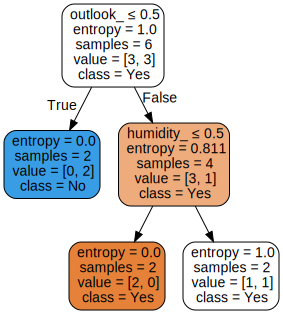

In [173]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,
                     class_names=['Yes','No'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph